In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('boston_house_price.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.shape

(506, 14)

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

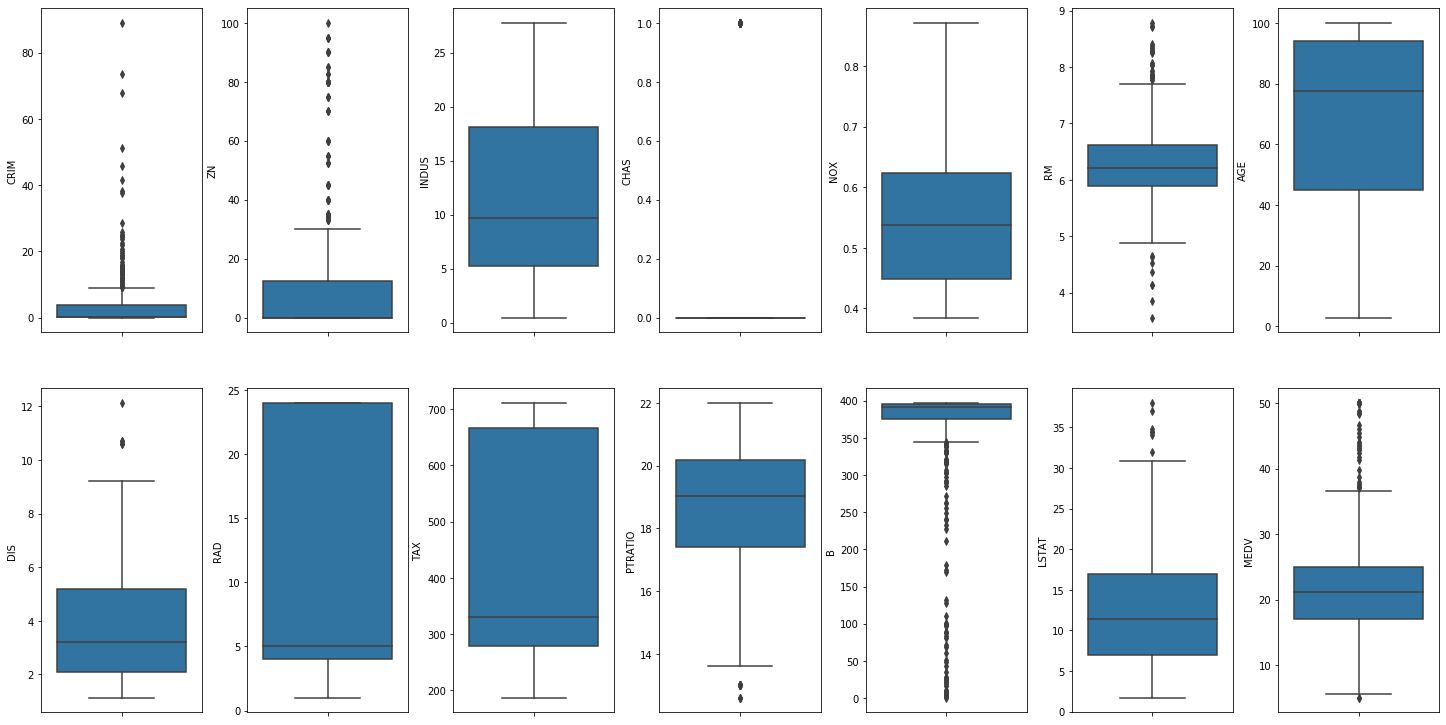

In [8]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
for key, val in df.items():
    sns.boxplot(y=key, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

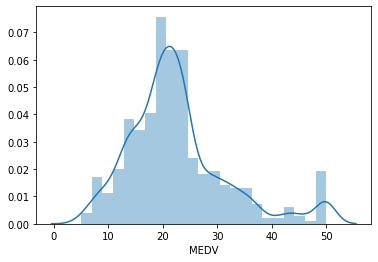

In [9]:
sns.distplot(df['MEDV'])

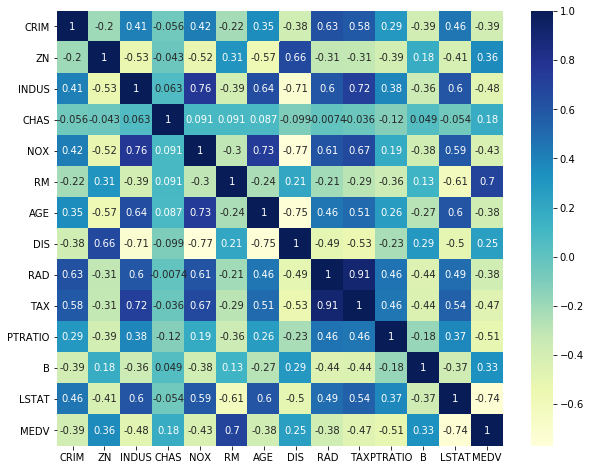

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True, cmap='YlGnBu')

In [11]:
df_train,df_test=train_test_split(df,train_size=0.75,test_size= 0.25,random_state=100)

In [12]:
scaler= MinMaxScaler()

In [13]:
y_train= df_train.pop('MEDV')

In [14]:
X_train= df_train

In [15]:
cols= X_train.columns

In [16]:
X_train= scaler.fit_transform(X_train)

In [17]:
X_train= pd.DataFrame(X_train, columns= cols)

In [18]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.092412,0.00,0.646628,0.0,0.674897,0.482851,0.834043,0.165095,1.000000,0.913958,0.808511,1.000000,0.357892
1,0.002476,0.00,0.236437,0.0,0.129630,0.426327,0.290426,0.414006,0.086957,0.086042,0.563830,1.000000,0.342715
2,0.001121,0.21,0.189883,0.0,0.111111,0.460241,0.422340,0.593077,0.130435,0.105163,0.446809,0.996621,0.323400
3,0.006619,0.00,0.346041,0.0,0.327160,0.589002,0.813830,0.227769,0.130435,0.221797,0.617021,1.000000,0.077539
4,0.009785,0.00,0.281525,0.0,0.314815,0.415022,0.675532,0.277804,0.130435,0.227533,0.893617,0.984997,0.263521


In [19]:
model = sm.OLS(list(y_train),sm.add_constant(X_train))
results = model.fit()
results.params

const      25.727679
CRIM       -5.822972
ZN          4.573469
INDUS      -0.522735
CHAS        2.424250
NOX        -6.685726
RM         20.108553
AGE        -1.241082
DIS       -14.191618
RAD         6.830765
TAX        -6.886200
PTRATIO    -8.649982
B           4.318897
LSTAT     -16.415044
dtype: float64

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     80.81
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           7.66e-99
Time:                        23:23:06   Log-Likelihood:                -1110.2
No. Observations:                 379   AIC:                             2248.
Df Residuals:                     365   BIC:                             2304.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7277      2.718      9.467      0.000      20.384      31.072
CRIM          -5.8230      3.250     -1.792      0.074     -12.214       0.568
ZN             4.5735      1.533      2.982      0.003       1.558       7.589
INDUS         -0.5227      1.908     -0.274      0.784      -4.276       3.230
CHAS           2.4243      0.936      2.591      0.010       0.584       4.264
NOX           -6.6857      2.112     -3.166      0.002     -10.839      -2.533
RM            20.1086      2.474      8.128      0.000      15.244      24.974
AGE           -1.2411      1.432     -0.867      0.387      -4.057       1.574
DIS          -14.1916      2.200     -6.450      0.000     -18.518      -9.865
RAD            6.8308      1.739      3.929      0.000       3.412      10.250
TAX           -6.8862      2.215     -3.109      0.002     -11.242      -2.531
PTRATIO       -8.6500      1.390     -6.221      0.000     -11.384      -5.916
B              4.3189      1.246      3.466      0.001       1.869       6.769
LSTAT        -16.4150      2.079     -7.896      0.000     -20.503     -12.327
==============================================================================
Omnibus:                      119.773   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.064
Skew:                           1.384   Prob(JB):                     3.03e-93
Kurtosis:                       7.395   Cond. No.                         31.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
X_train1= X_train.drop('INDUS', axis=1)

In [22]:
model1 = sm.OLS(list(y_train),sm.add_constant(X_train1))
results1 = model1.fit().summary()
results1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     87.76
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.30e-100
Time:                        23:23:06   Log-Likelihood:                -1110.2
No. Observations:                 379   AIC:                             2246.
Df Residuals:                     366   BIC:                             2298.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.6033      2.676      9.568      0.000      20.341      30.865
CRIM          -5.7585      3.237     -1.779      0.076     -12.125       0.608
ZN             4.6154      1.524      3.029      0.003       1.619       7.612
CHAS           2.3960      0.929      2.580      0.010       0.570       4.222
NOX           -6.8240      2.048     -3.332      0.001     -10.851      -2.797
RM            20.1664      2.462      8.192      0.000      15.325      25.007
AGE           -1.2304      1.429     -0.861      0.390      -4.041       1.581
DIS          -14.0510      2.137     -6.576      0.000     -18.253      -9.849
RAD            6.9654      1.665      4.182      0.000       3.690      10.241
TAX           -7.1626      1.969     -3.637      0.000     -11.035      -3.290
PTRATIO       -8.7067      1.373     -6.341      0.000     -11.407      -6.006
B              4.3302      1.244      3.481      0.001       1.884       6.776
LSTAT        -16.4869      2.060     -8.004      0.000     -20.537     -12.437
==============================================================================
Omnibus:                      119.457   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              422.743
Skew:                           1.382   Prob(JB):                     1.59e-92
Kurtosis:                       7.374   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X_train1= X_train1.drop('AGE', axis=1)

In [24]:
model2 = sm.OLS(list(y_train),sm.add_constant(X_train1))
results2 = model2.fit().summary()
results2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     95.74
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.19e-100
Time:                        23:23:06   Log-Likelihood:                -1110.6
No. Observations:                 379   AIC:                             2245.
Df Residuals:                     367   BIC:                             2293.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2687      2.647      9.548      0.000      20.064      30.473
CRIM          -5.8150      3.236     -1.797      0.073     -12.178       0.548
ZN             4.8101      1.506      3.193      0.002       1.848       7.773
CHAS           2.3593      0.927      2.544      0.011       0.535       4.183
NOX           -7.3194      1.965     -3.725      0.000     -11.183      -3.456
RM            19.7422      2.411      8.188      0.000      15.001      24.484
DIS          -13.4293      2.010     -6.681      0.000     -17.382      -9.476
RAD            7.0783      1.660      4.265      0.000       3.815      10.342
TAX           -7.1886      1.968     -3.652      0.000     -11.059      -3.318
PTRATIO       -8.7909      1.369     -6.420      0.000     -11.483      -6.098
B              4.2414      1.239      3.423      0.001       1.805       6.678
LSTAT        -17.0736      1.943     -8.787      0.000     -20.894     -13.253
==============================================================================
Omnibus:                      116.068   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.420
Skew:                           1.356   Prob(JB):                     2.25e-86
Kurtosis:                       7.198   Cond. No.                         28.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
X_train1= X_train1.drop('CRIM', axis=1)

In [26]:
model3 = sm.OLS(list(y_train),sm.add_constant(X_train1))
results3 = model3.fit().summary()
results3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     104.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.60e-101
Time:                        23:23:06   Log-Likelihood:                -1112.3
No. Observations:                 379   AIC:                             2247.
Df Residuals:                     368   BIC:                             2290.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8490      2.644      9.397      0.000      19.649      30.049
ZN             4.4994      1.501      2.997      0.003       1.548       7.451
CHAS           2.4558      0.929      2.644      0.009       0.629       4.282
NOX           -6.9985      1.962     -3.566      0.000     -10.858      -3.139
RM            19.9993      2.414      8.284      0.000      15.252      24.747
DIS          -12.9791      2.001     -6.488      0.000     -16.913      -9.045
RAD            6.1019      1.573      3.879      0.000       3.009       9.195
TAX           -7.0288      1.972     -3.564      0.000     -10.907      -3.151
PTRATIO       -8.7006      1.372     -6.340      0.000     -11.399      -6.002
B              4.5475      1.231      3.694      0.000       2.127       6.968
LSTAT        -17.8151      1.904     -9.354      0.000     -21.560     -14.070
==============================================================================
Omnibus:                      111.354   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              378.012
Skew:                           1.297   Prob(JB):                     8.24e-83
Kurtosis:                       7.148   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
y_test= df_test.pop('MEDV')

In [28]:
X_test= df_test

In [29]:
cols= X_test.columns

In [30]:
X_test= scaler.transform(X_test)

In [31]:
X_test= pd.DataFrame(X_test,columns= cols)

In [32]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000427,0.8,0.038856,0.0,0.039095,0.711439,0.343617,0.644710,0.043478,0.269598,0.000000,0.988149,0.134934
1,0.005922,0.0,0.210411,0.0,0.244856,0.573098,0.163830,0.233786,0.304348,0.227533,0.510638,0.958243,0.056015
2,0.000530,0.0,0.420455,0.0,0.386831,0.490324,0.752128,0.120178,0.000000,0.162524,0.893617,1.000000,0.202815
3,0.018339,0.0,0.281525,0.0,0.314815,0.481127,1.000000,0.317341,0.130435,0.227533,0.893617,0.949140,0.312086
4,0.003363,0.0,0.346041,0.0,0.327160,0.410807,0.762766,0.293316,0.130435,0.221797,0.617021,0.998790,0.269592


In [33]:
X_train1.columns

Index(['ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

In [34]:
X_test1= X_test[['ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT']]

In [35]:
r2_score(y_test,model3.predict(sm.add_constant(X_test1)))

ValueError: shapes (379,11) and (127,11) not aligned: 11 (dim 1) != 127 (dim 0)

In [37]:
lr= LinearRegression()
lr.fit(X_train, y_train)
r2_score(y_train, lr.predict(X_train))

0.7421573768304616

In [38]:
r2_score(y_test,lr.predict(X_test))

0.7246154314616737

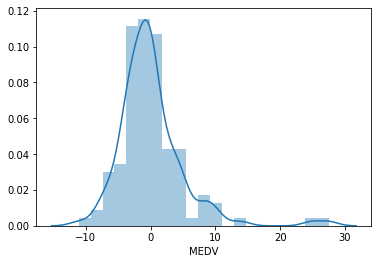

In [39]:
res= y_test-lr.predict(X_test)
sns.distplot(res)

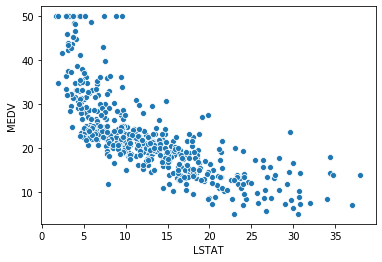

In [59]:
sns.scatterplot(df['LSTAT'],df['MEDV'])

In [52]:
lasso= Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
r2_score(y_train, lasso.predict(X_train))

0.7421479505069828

In [54]:
r2_score(y_test,lasso.predict(X_test))

0.7242631786265006

In [55]:
ridge= Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
r2_score(y_train, ridge.predict(X_train))

0.7421573716595724

In [57]:
r2_score(y_test,ridge.predict(X_test))

0.7246028098748201